In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
import json
import random
import time
import pickle
from brokenaxes import brokenaxes
from striprtf.striprtf import rtf_to_text
from glob import glob
from multiprocessing import Pool
from scipy.io import mmread
from collections import OrderedDict
#import scanpy as sc
import pandas as pd
from scipy.stats.mstats import gmean
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, zscore, ttest_ind, ranksums, spearmanr, fisher_exact
import os, sys
import statsmodels.api as sm
from copy import deepcopy
import numpy as np
from scipy.sparse import csr_matrix
from collections import Counter, defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
from scipy import stats
from tqdm import tqdm
import glob
import os

### sFigure1C Comparison of normalized counts of cell-free eccDNA and ecDNA detected with or without rolling circle amplification (RCA)

In [6]:
sFigure1D_txt = pd.read_csv("/home/luosongwen/scantecc/RCA_nRCA.txt",sep="\t", index_col=0)

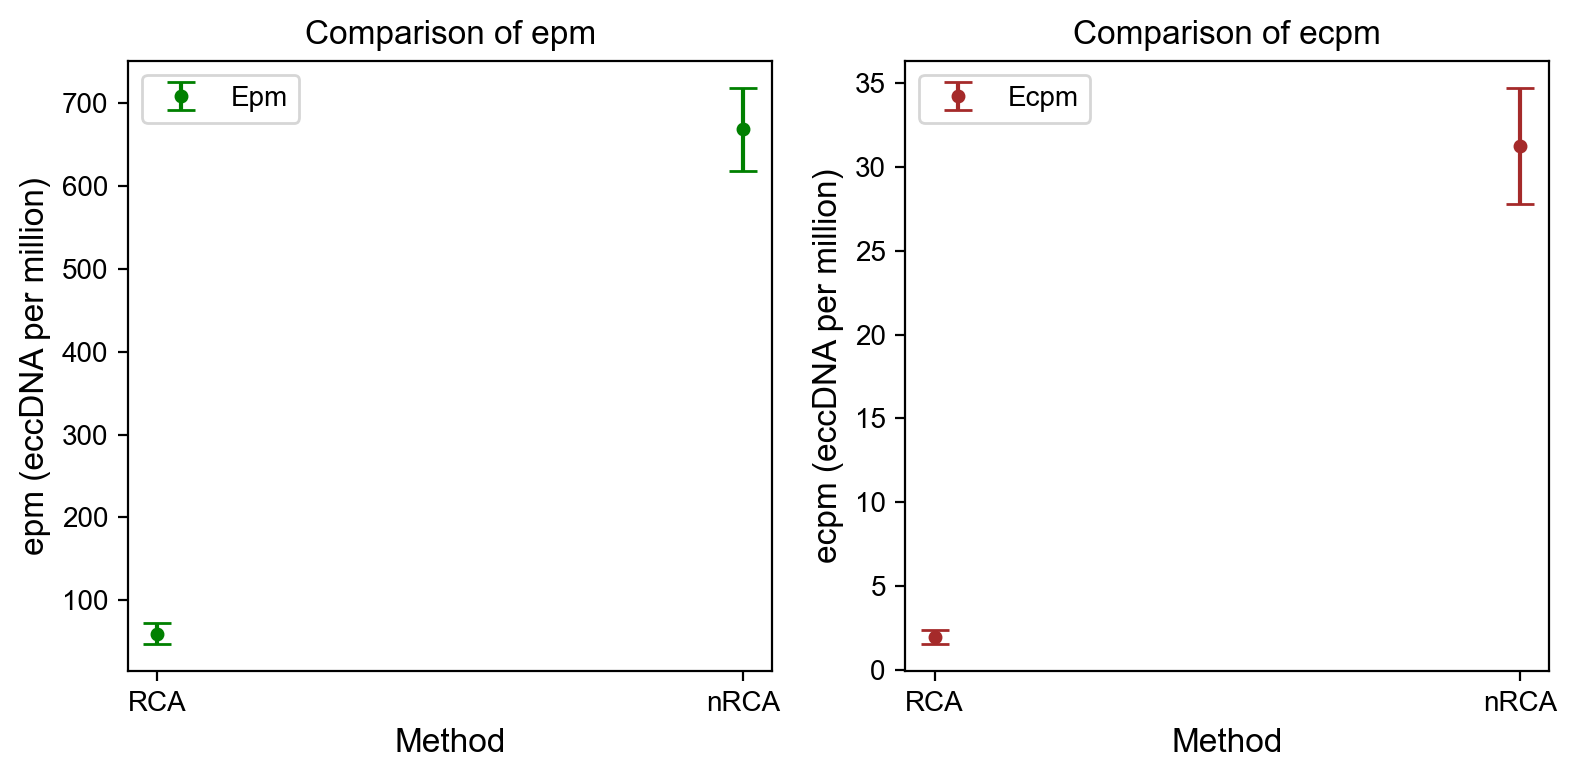

In [7]:
# 读取数据
df = sFigure1D_txt.copy()

# 提取 Method（分类为 RCA 和 nRCA）
df["Method"] = df["label"].apply(lambda x: "nRCA" if "nRCA" in x else "RCA")

# 计算 RCA 和 nRCA 组的均值和标准误
grouped = df.groupby("Method").agg({"epm": ["mean", "sem"], "ecpm": ["mean", "sem"]}).reset_index()
grouped.columns = ["Method", "epm_mean", "epm_sem", "ecpm_mean", "ecpm_sem"]

# 创建两个子图，缩小子图宽度
fig, axes = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 1]})

# 颜色设置
epm_color = "green"
ecpm_color = "brown"

# 调整 X 坐标位置，往中间移动
x_positions = [0.8, 1.2]  # 让数据更靠近中心，而非默认的[0,1]

# **第一张图：epm 比较**
axes[0].errorbar(x_positions, grouped["epm_mean"], yerr=grouped["epm_sem"], 
                 fmt="o", color=epm_color, capsize=5, markersize=4, label="Epm")
axes[0].set_ylabel("epm (eccDNA per million)", fontsize=12)
axes[0].set_xlabel("Method", fontsize=12)
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(["RCA", "nRCA"], fontsize=12)
axes[0].tick_params(axis="both", labelsize=10)
axes[0].set_title("Comparison of epm", fontsize=12)
axes[0].legend(fontsize=10)

# **第二张图：ecpm 比较**
axes[1].errorbar(x_positions, grouped["ecpm_mean"], yerr=grouped["ecpm_sem"], 
                 fmt="o", color=ecpm_color, capsize=5, markersize=4, label="Ecpm")
axes[1].set_ylabel("ecpm (eccDNA per million)", fontsize=12)
axes[1].set_xlabel("Method", fontsize=12)
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(["RCA", "nRCA"], fontsize=12)
axes[1].tick_params(axis="both", labelsize=10)
axes[1].set_title("Comparison of ecpm", fontsize=12)
axes[1].legend(fontsize=10)

# 调整子图之间的间距
plt.tight_layout()

#plt.savefig('/home/luosongwen/scantecc/2025_03_10_Figure_result/Figure/Sfigure1D/sfigure1D_refined.pdf',bbox_inches='tight')

# 显示图像
plt.show()

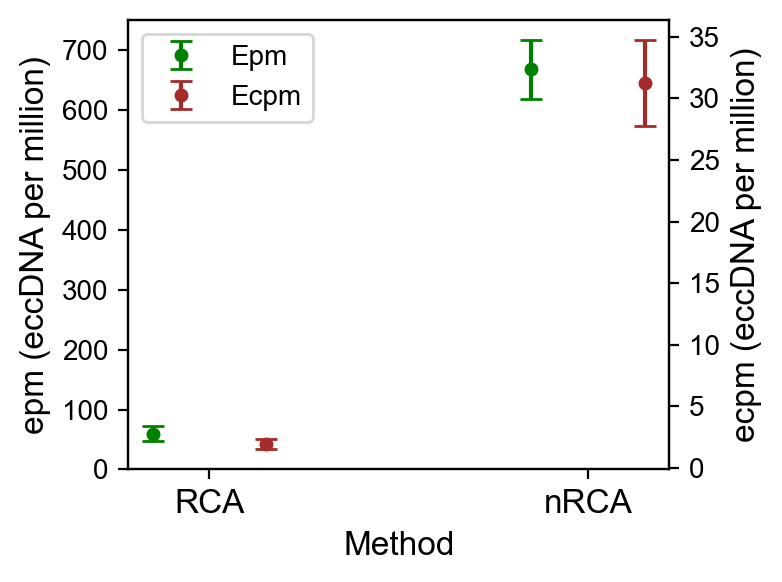

In [8]:
import matplotlib.pyplot as plt

# 创建基础图和主轴（左Y轴）
fig, ax1 = plt.subplots(figsize=(4, 3))

# 创建右Y轴
ax2 = ax1.twinx()

# 颜色设置
epm_color = "green"   # 绿色
ecpm_color = "brown"  # 棕色

# X轴位置：设置略微偏移的左右位置，避免重叠
x_labels = ["RCA", "nRCA"]
x_epm = [0 - 0.03, 0.2 - 0.03]  # epm 向左偏移
x_ecpm = [0 + 0.03, 0.2 + 0.03]  # ecpm 向右偏移

# 绘制 epm（左轴）
epm = ax1.errorbar(x_epm, grouped["epm_mean"], yerr=grouped["epm_sem"],
                   fmt='o', color=epm_color, capsize=4, markersize=4, label='Epm')

# 绘制 ecpm（右轴）
ecpm = ax2.errorbar(x_ecpm, grouped["ecpm_mean"], yerr=grouped["ecpm_sem"],
                    fmt='o', color=ecpm_color, capsize=4, markersize=4, label='Ecpm')

# 设置X轴
ax1.set_xticks([0, 0.2])
ax1.set_xticklabels(x_labels, fontsize=12)
ax1.set_xlabel("Method", fontsize=12)

# 设置Y轴标签
ax1.set_ylabel("epm (eccDNA per million)", fontsize=12)
ax2.set_ylabel("ecpm (eccDNA per million)", fontsize=12)

# 设置左Y轴范围为 (0, 700)
ax1.set_ylim(0, 750)

# 添加图例（合并两个轴的图例）
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

# 不隐藏任何边框（默认设置，不需要额外清除）
# 如之前有使用 ax.spines.set_visible(False)，请删掉或注释掉

# 展示图像
plt.tight_layout()
#plt.savefig('/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/sF1c_errorbar_plot.pdf', bbox_inches='tight')
plt.show()

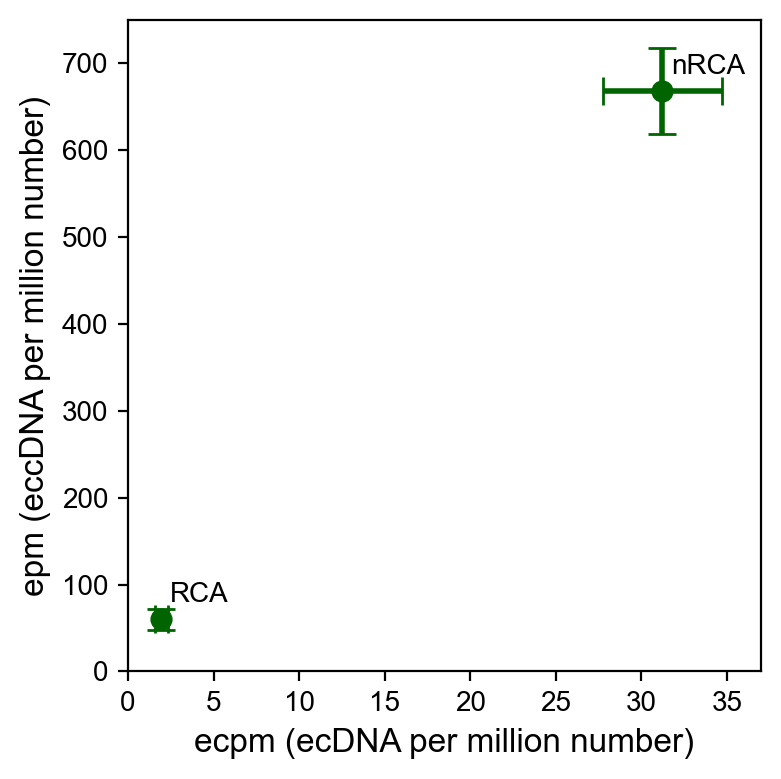

In [9]:
# 计算每组 Method 的均值和标准误差
grouped = df.groupby("Method").agg({
    "epm": ["mean", "sem"],
    "ecpm": ["mean", "sem"]
}).reset_index()
grouped.columns = ["Method", "epm_mean", "epm_sem", "ecpm_mean", "ecpm_sem"]

# 创建图像
fig, ax1 = plt.subplots(figsize=(4, 4))

# 主轴：绘制 epm（Y） vs ecpm（X）散点图
ax1.errorbar(
    grouped["ecpm_mean"], grouped["epm_mean"],
    xerr=grouped["ecpm_sem"], yerr=grouped["epm_sem"],
    fmt='o', capsize=5, elinewidth=2, markersize=7,
    color='darkgreen', label='Epm vs Ecpm'
)

# 设置主轴标签
ax1.set_xlabel("ecpm (ecDNA per million number)", fontsize=12)
ax1.set_ylabel("epm (eccDNA per million number)", fontsize=12)
ax1.tick_params(labelsize=10)

# 设置左Y轴范围为 (0, 700)
ax1.set_ylim(0, 750)
ax1.set_xlim(0, 37)
ax1.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])

# 标注每个 Method
for i, row in grouped.iterrows():
    ax1.text(row["ecpm_mean"] + 0.5, row["epm_mean"] + 20, row["Method"],
             fontsize=10, color='black')

# 设置网格和标题
#ax1.set_title("Epm vs Ecpm (by Method)", fontsize=14)
ax1.grid(False)

# 显示图像
plt.tight_layout()
#plt.savefig('/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/sF1c_errorbar_plot.pdf', bbox_inches='tight')
plt.show()